# Singular Value Decomposition with Dropped Values

In the previous notebook, we saw that using **all** singular values allows us to perfectly reconstruct the original matrix.  
Now, we'll explore what happens when we intentionally **drop some singular values** and rebuild the matrix with fewer components.

This is the foundation of **compression** (keeping the most important singular values) and **de-enhancement** (intentionally discarding detail).

--

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 7x7 matrix with some structure
A = np.array([
    [10, 20, 30, 40, 50, 60, 70],
    [15, 25, 35, 45, 55, 65, 75],
    [20, 30, 40, 50, 60, 70, 80],
    [25, 35, 45, 55, 65, 75, 85],
    [30, 40, 50, 60, 70, 80, 90],
    [35, 45, 55, 65, 75, 85, 95],
    [40, 50, 60, 70, 80, 90, 100]
])

# Perform SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)

print("Original singular values:")
print(S)


Original singular values:
[4.14930320e+02 2.36184235e+01 2.12039398e-14 5.12179328e-15
 1.29326281e-15 7.74995691e-16 4.47193620e-16]


## Visualizing Singular Values

As before, let's plot the singular values.  
Notice how they decrease in size — the first few are much larger, meaning they capture most of the matrix’s structure.

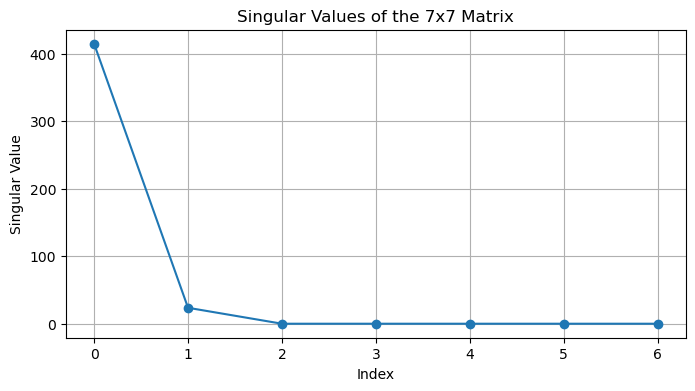

In [2]:
plt.figure(figsize=(8, 4))
plt.plot(S, marker='o')
plt.title('Singular Values of the 7x7 Matrix')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()


## Reconstructing with Fewer Singular Values

Now, let's try reconstructing the matrix with:
- **k = 7** (all values → perfect reconstruction)  
- **k = 3** (only the top 3 singular values)  
- **k = 1** (only the most important singular value)  

This will let us see how much detail we lose as we drop smaller values.

In [4]:
def reconstruct(U, S, VT, k):
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]
    return U_k @ S_k @ VT_k

# Reconstruct with different k
A_k7 = reconstruct(U, S, VT, 7)
A_k3 = reconstruct(U, S, VT, 3)
A_k1 = reconstruct(U, S, VT, 1)

## Comparing Reconstructions

We’ll plot the original matrix and the reconstructions side by side.

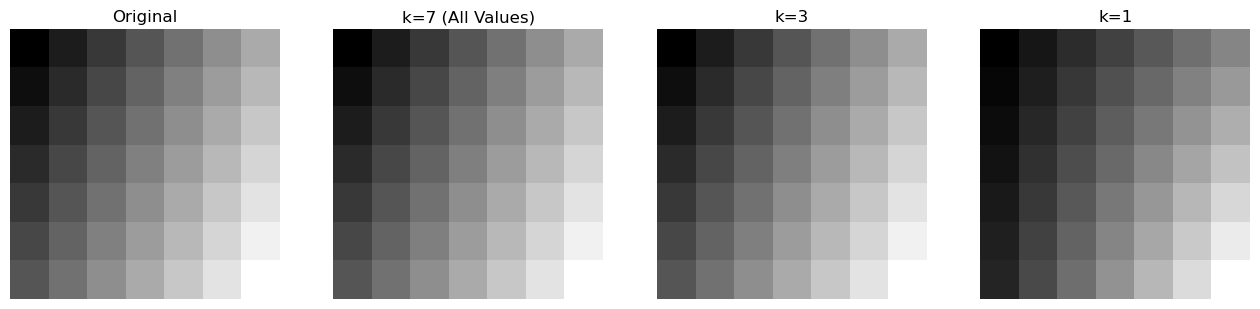

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].imshow(A, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(A_k7, cmap='gray')
axs[1].set_title("k=7 (All Values)")
axs[1].axis('off')

axs[2].imshow(A_k3, cmap='gray')
axs[2].set_title("k=3")
axs[2].axis('off')

axs[3].imshow(A_k1, cmap='gray')
axs[3].set_title("k=1")
axs[3].axis('off')

plt.show()


## Observations

- **k=7 (all values):** Exact reconstruction of the original.  
- **k=3:** Structure is mostly preserved, but fine details are lost.  
- **k=1:** Only the dominant structure remains; much of the detail is gone.  

This experiment shows how SVD allows us to balance between **accuracy** (using more singular values) and **simplicity** (using fewer singular values).

In the next step, we’ll apply this to **real images**, where dropping singular values results in visible compression or intentional de-enhancement.